SARIMA Model

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the transformed dataset
transformed_data_path = '/transformed_rainfall_data.csv'
transformed_data = pd.read_csv(transformed_data_path)

# Check the column names
print("Column Names in Dataset:", transformed_data.columns)

# Split the data into train and test sets
train_size = int(0.8 * len(transformed_data))
train_data = transformed_data[:train_size]
test_data = transformed_data[train_size:]

# Function to train SARIMA model and plot results
def train_and_plot_sarima(data, column):
    # Train SARIMA model
    sarima_model = SARIMAX(data['train'][column], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    sarima_result = sarima_model.fit()

    # Make predictions
    predictions = sarima_result.predict(start=len(data['train']), end=len(data['train']) + len(data['test']) - 1, dynamic=False)

    # Calculate evaluation metrics
    mse = mean_squared_error(data['test'][column], predictions)
    mae = mean_absolute_error(data['test'][column], predictions)
    r2 = r2_score(data['test'][column], predictions)

    return mse, mae, r2

# Dictionary to store results
results = {}

# Prepare data dictionaries
data_dict = {'train': train_data, 'test': test_data}

# Train and plot for Vavuniya
results['Vavuniya'] = train_and_plot_sarima(data_dict, 'Vavuniya')

# Train and plot for Anuradhapura
results['Anuradhapura'] = train_and_plot_sarima(data_dict, 'Anuradhapura')

# Train and plot for Maha Illuppallama
results['Maha Illuppallama'] = train_and_plot_sarima(data_dict, 'Maha Illuppallama')

# Print results
for location, metrics in results.items():
    print(f"{location} - MSE: {metrics[0]}, MAE: {metrics[1]}, R²: {metrics[2]}")


Column Names in Dataset: Index(['Date', 'Vavuniya', 'Anuradhapura', 'Maha Illuppallama'], dtype='object')
Vavuniya - MSE: 259.3668029012234, MAE: 7.940694379497953, R²: -0.06291593503171722
Anuradhapura - MSE: 245.81476824812825, MAE: 5.905344252731736, R²: -0.05365210402354381
Maha Illuppallama - MSE: 255.75607158160196, MAE: 6.2280821967063735, R²: -0.15513135091595975


Column Names in Dataset: Index(['Date', 'Vavuniya', 'Anuradhapura', 'Maha Illuppallama'], dtype='object')


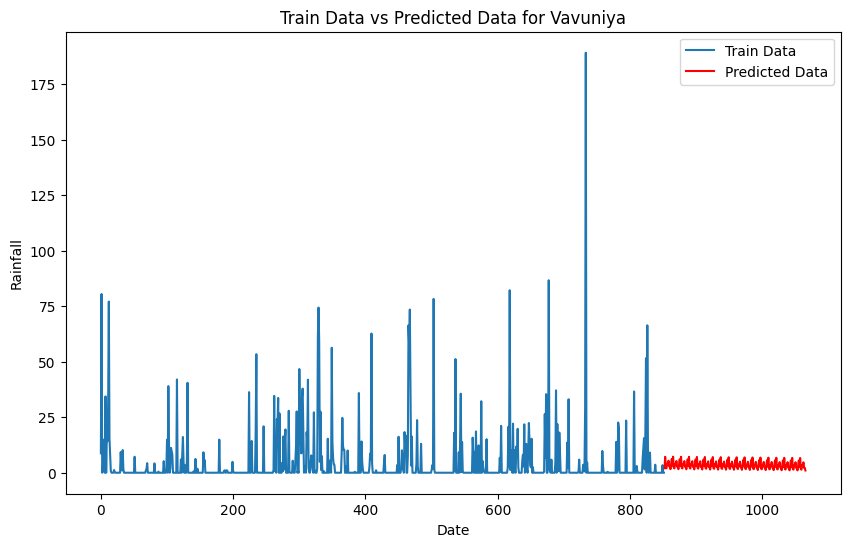

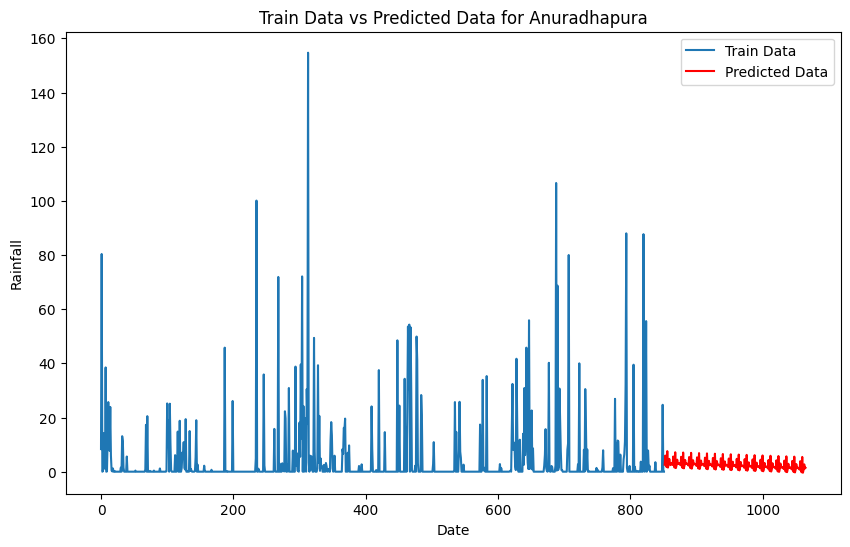

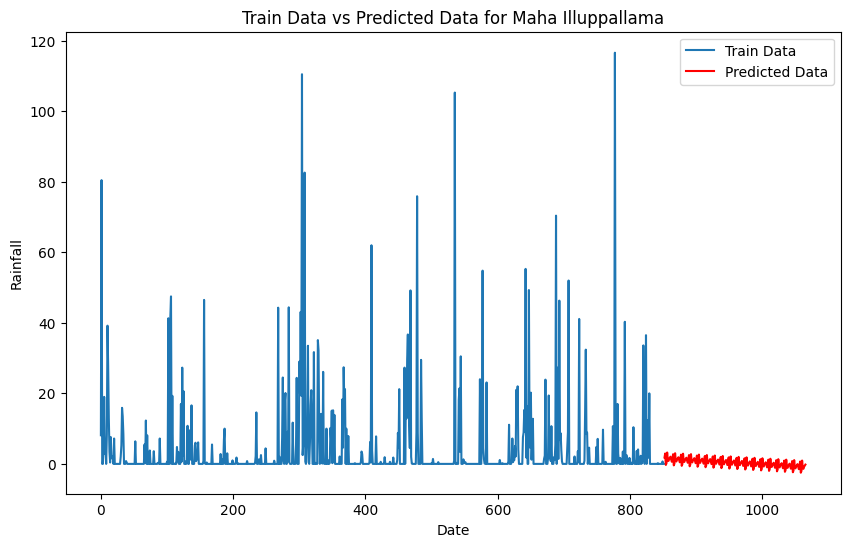

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the transformed dataset
transformed_data_path = '/transformed_rainfall_data.csv'
transformed_data = pd.read_csv(transformed_data_path)

# Check the column names
print("Column Names in Dataset:", transformed_data.columns)

# Split the data into train and test sets
train_size = int(0.8 * len(transformed_data))
train_data = transformed_data[:train_size]
test_data = transformed_data[train_size:]

# Function to train SARIMA model and plot results
def train_and_plot_sarima(data, column):
    # Train SARIMA model
    sarima_model = SARIMAX(data['train'][column], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    sarima_result = sarima_model.fit()

    # Make predictions
    predictions = sarima_result.predict(start=len(data['train']), end=len(data['train']) + len(data['test']) - 1, dynamic=False)

    # Plot train data vs predicted data
    plt.figure(figsize=(10, 6))
    plt.plot(data['train'][column], label='Train Data')
    plt.plot(data['test'].index, predictions, label='Predicted Data', color='red')
    plt.xlabel('Date')
    plt.ylabel('Rainfall')
    plt.title(f'Train Data vs Predicted Data for {column}')
    plt.legend()
    plt.show()

    return predictions

# List of stations to plot
stations_to_plot = ['Vavuniya', 'Anuradhapura', 'Maha Illuppallama']

# Dictionary to store results
results = {}

# Prepare data dictionaries
data_dict = {'train': train_data, 'test': test_data}

# Train and plot for each station
for station in stations_to_plot:
    results[station] = train_and_plot_sarima(data_dict, station)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

Average Mean Squared Error for Vavuniya: 258.1960238859754
Average Mean Squared Error for Anuradhapura: 280.13513375566373
Average Mean Squared Error for Maha Illuppallama: 271.6943285383


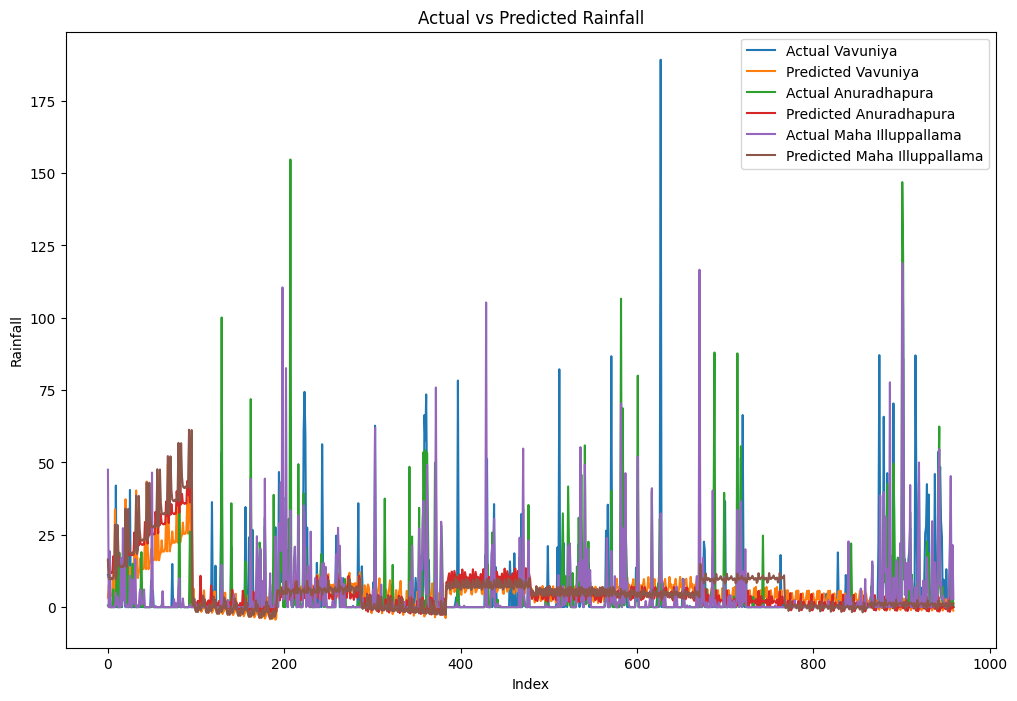

Region: Vavuniya
MAE: 8.985285873576155
MSE: 258.19602388597536
R-squared: -0.31982543717293455
Region: Anuradhapura
MAE: 8.703496986413718
MSE: 280.13513375566373
R-squared: -0.4141095998060451
Region: Maha Illuppallama
MAE: 9.354636763520194
MSE: 271.6943285383
R-squared: -0.6614791162495537


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit

# Load the transformed dataset
transformed_data_path = '/transformed_rainfall_data.csv'  # Specify the correct file path
transformed_data = pd.read_csv(transformed_data_path)

# Feature Engineering
# Example: Adding lag features
for region in ['Vavuniya', 'Anuradhapura', 'Maha Illuppallama']:
    transformed_data[f'{region}_Lag1'] = transformed_data[region].shift(1)
    transformed_data[f'{region}_Lag2'] = transformed_data[region].shift(2)

# Drop rows with NaN values due to the introduction of lag features
transformed_data.dropna(inplace=True)

# Define number of folds for cross-validation
n_splits = 10

# Perform Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize lists to store MSE values for each region
mse_values_vavuniya = []
mse_values_anuradhapura = []
mse_values_maha_illuppallama = []

# Initialize lists to store actual and predicted values for plotting
actual_values = {region: [] for region in ['Vavuniya', 'Anuradhapura', 'Maha Illuppallama']}
predicted_values = {region: [] for region in ['Vavuniya', 'Anuradhapura', 'Maha Illuppallama']}

# Iterate over each fold
for train_index, test_index in tscv.split(transformed_data):
    # Split data into train and test sets
    train_data, test_data = transformed_data.iloc[train_index], transformed_data.iloc[test_index]

    for region in ['Vavuniya', 'Anuradhapura', 'Maha Illuppallama']:
        # Train SARIMA model
        sarima_model = SARIMAX(train_data[region], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
        sarima_result = sarima_model.fit()

        # Make predictions
        predictions = sarima_result.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

        # Calculate Mean Squared Error
        mse = mean_squared_error(test_data[region], predictions)

        # Append MSE value to respective list
        if region == 'Vavuniya':
            mse_values_vavuniya.append(mse)
        elif region == 'Anuradhapura':
            mse_values_anuradhapura.append(mse)
        elif region == 'Maha Illuppallama':
            mse_values_maha_illuppallama.append(mse)

        # Append actual and predicted values for plotting
        actual_values[region].extend(test_data[region])
        predicted_values[region].extend(predictions)

# Calculate average MSE across all folds
average_mse_vavuniya = np.mean(mse_values_vavuniya)
average_mse_anuradhapura = np.mean(mse_values_anuradhapura)
average_mse_maha_illuppallama = np.mean(mse_values_maha_illuppallama)

print(f'Average Mean Squared Error for Vavuniya: {average_mse_vavuniya}')
print(f'Average Mean Squared Error for Anuradhapura: {average_mse_anuradhapura}')
print(f'Average Mean Squared Error for Maha Illuppallama: {average_mse_maha_illuppallama}')

# Plot actual vs predicted values for all three regions
plt.figure(figsize=(12, 8))

for region in ['Vavuniya', 'Anuradhapura', 'Maha Illuppallama']:
    plt.plot(actual_values[region], label=f'Actual {region}')
    plt.plot(predicted_values[region], label=f'Predicted {region}')

plt.xlabel('Index')
plt.ylabel('Rainfall')
plt.title('Actual vs Predicted Rainfall')
plt.legend()
plt.show()

# Calculate RMSE, MAE, and R-squared for each region
mae_values = {}
mse_values = {}
r_squared_values = {}

for region in ['Vavuniya', 'Anuradhapura', 'Maha Illuppallama']:
    # Calculate MAE
    mae = mean_absolute_error(actual_values[region], predicted_values[region])
    mae_values[region] = mae

    # Calculate MSE
    mse = mean_squared_error(actual_values[region], predicted_values[region])
    mse_values[region] = mse

    # Calculate R-squared
    r_squared = r2_score(actual_values[region], predicted_values[region])
    r_squared_values[region] = r_squared

# Print MAE, MSE, and R-squared values for each region
for region in ['Vavuniya', 'Anuradhapura', 'Maha Illuppallama']:
    print(f'Region: {region}')
    print(f'MAE: {mae_values[region]}')
    print(f'MSE: {mse_values[region]}')
    print(f'R-squared: {r_squared_values[region]}')


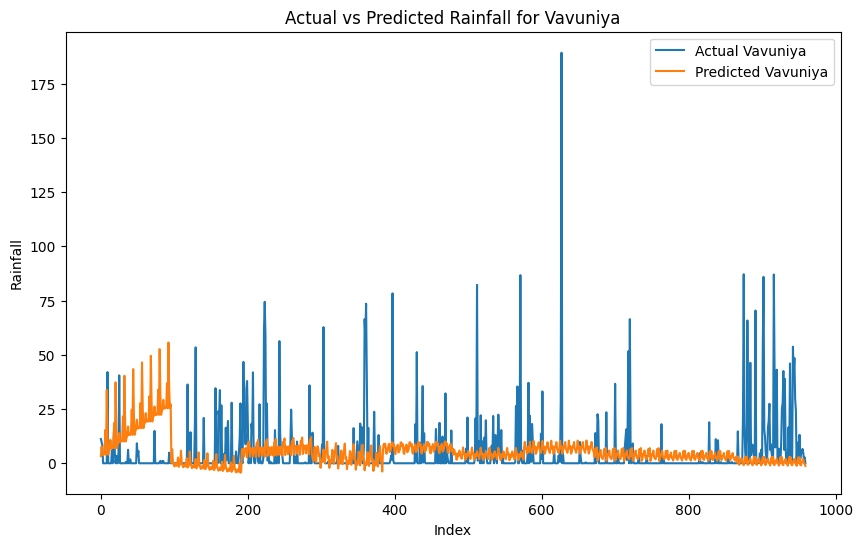

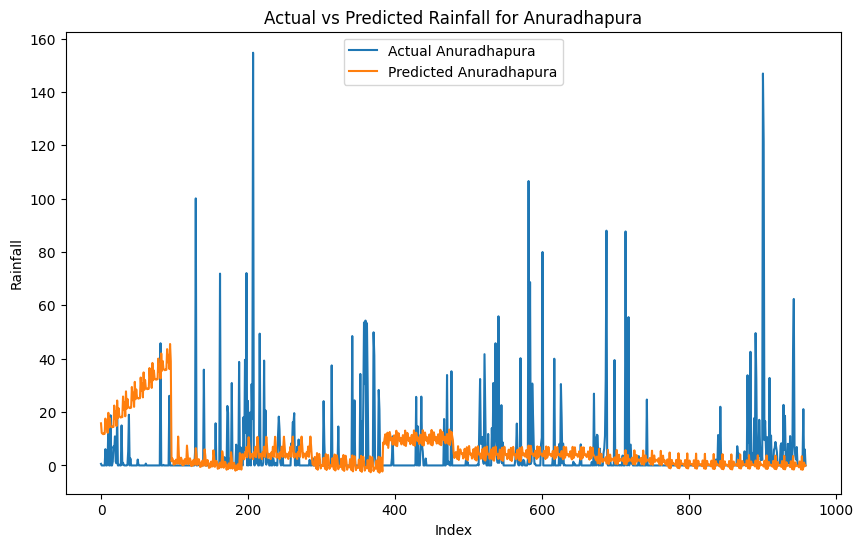

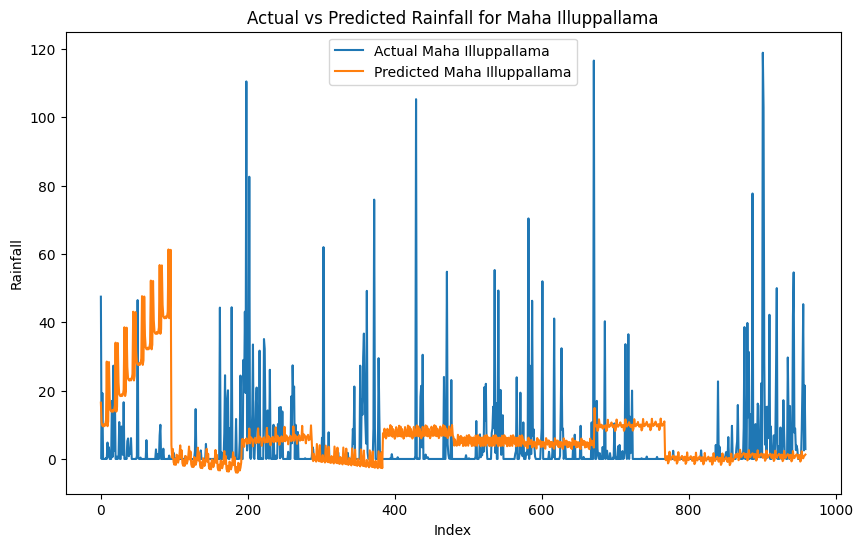

In [ ]:
# Plot actual vs predicted values for each region separately
for region in ['Vavuniya', 'Anuradhapura', 'Maha Illuppallama']:
    plt.figure(figsize=(10, 6))
    plt.plot(actual_values[region], label=f'Actual {region}')
    plt.plot(predicted_values[region], label=f'Predicted {region}')
    plt.xlabel('Index')
    plt.ylabel('Rainfall')
    plt.title(f'Actual vs Predicted Rainfall for {region}')
    plt.legend()
    plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

Best SARIMA parameters for Vavuniya: (1, 1, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


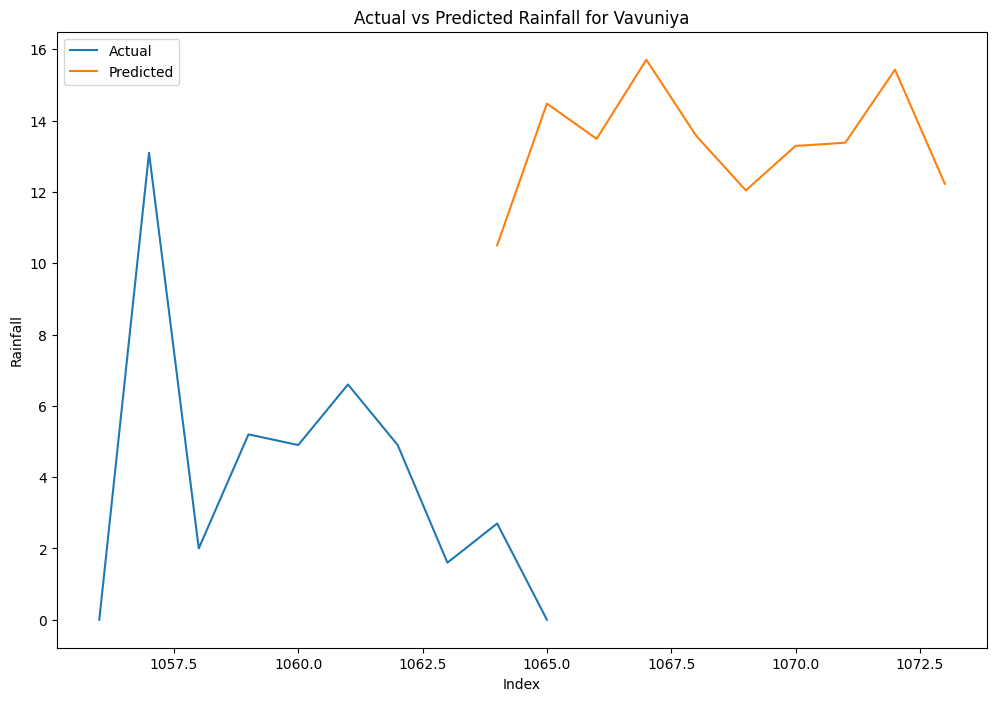

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

Best SARIMA parameters for Anuradhapura: (0, 0, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


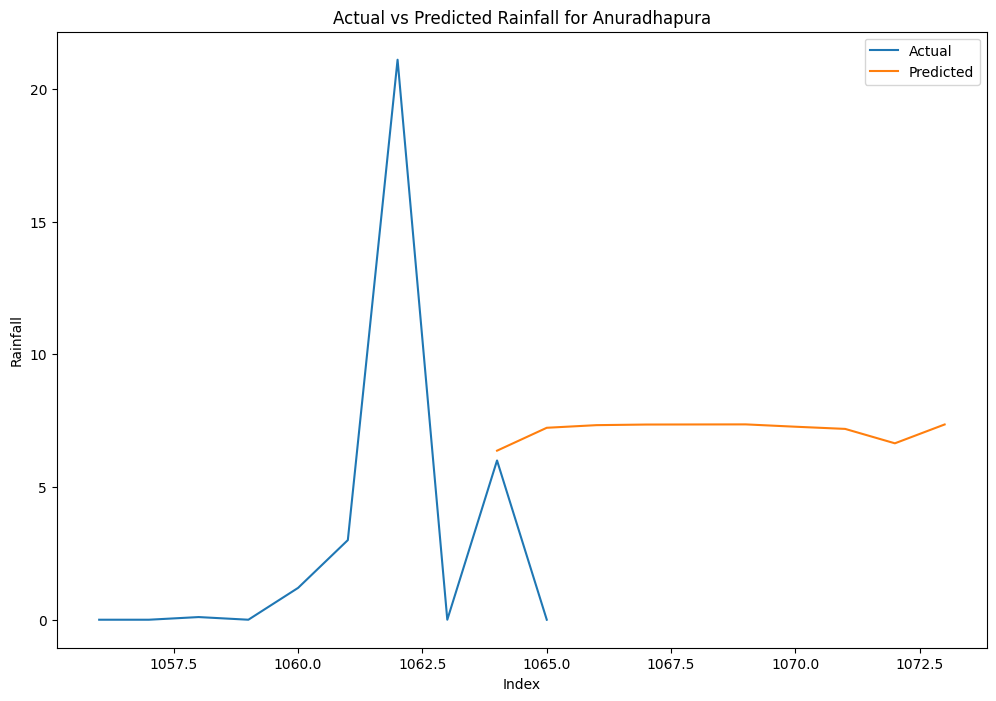

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

No suitable SARIMA model found for Maha Illuppallama.
Region: Vavuniya
MSE: 74.4767756876631
MAE: 9.313830732530691
R-squared: -6.210798230451133
Region: Anuradhapura
MSE: 60.51547917197028
MAE: 6.772537899715874
R-squared: -0.40845928852526225
No metrics available for Maha Illuppallama.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit

# Load the transformed dataset
transformed_data_path = '/transformed_rainfall_data.csv'  # Specify the correct file path
transformed_data = pd.read_csv(transformed_data_path)

# Feature Engineering
# Example: Adding lag features
for region in ['Vavuniya', 'Anuradhapura', 'Maha Illuppallama']:
    transformed_data[f'{region}_Lag1'] = transformed_data[region].shift(1)
    transformed_data[f'{region}_Lag2'] = transformed_data[region].shift(2)

# Drop rows with NaN values due to the introduction of lag features
transformed_data.dropna(inplace=True)

# Define number of folds for cross-validation
n_splits = 10

# Perform Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=n_splits)

# Define SARIMA parameter grid
p = d = q = range(0, 2)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(product(p, d, q))]

# Initialize best parameters and minimum MSE
best_params = {}
best_mse = np.inf

# Initialize dictionaries to store metrics
mse_values = {}
mae_values = {}
r_squared_values = {}

# Iterate over each region
for region in ['Vavuniya', 'Anuradhapura', 'Maha Illuppallama']:
    # Initialize best SARIMA model for the region
    best_model = None

    # Iterate over each SARIMA parameter combination
    for param in seasonal_pdq:
        try:
            # Train SARIMA model
            sarima_model = SARIMAX(transformed_data[region], order=(1, 1, 1), seasonal_order=param)
            sarima_result = sarima_model.fit()

            # Make predictions
            predictions = sarima_result.predict(start=len(transformed_data) - n_splits, end=len(transformed_data) - 1, dynamic=False)

            # Calculate Mean Squared Error
            mse = mean_squared_error(transformed_data[region][-n_splits:], predictions)

            # Update best parameters if current model has lower MSE
            if mse < best_mse:
                best_mse = mse
                best_params[region] = param
                best_model = sarima_result

        except:
            continue

    # Print best parameters for the region if it exists
    if region in best_params:
        print(f'Best SARIMA parameters for {region}: {best_params[region]}')
    else:
        print(f'No suitable SARIMA model found for {region}.')
        continue

    # Make predictions using the best model
    predictions = best_model.predict(start=len(transformed_data), end=len(transformed_data) + n_splits - 1, dynamic=False)

    # Store actual and predicted values for calculating metrics
    actual_values = transformed_data[region][-n_splits:]

    # Calculate MAE
    mae = mean_absolute_error(actual_values, predictions)
    mae_values[region] = mae

    # Calculate R-squared
    r_squared = r2_score(actual_values, predictions)
    r_squared_values[region] = r_squared

    # Store MSE for later use
    mse_values[region] = best_mse

    # Plot actual vs predicted values for the region
    plt.figure(figsize=(12, 8))
    plt.plot(actual_values, label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.xlabel('Index')
    plt.ylabel('Rainfall')
    plt.title(f'Actual vs Predicted Rainfall for {region}')
    plt.legend()
    plt.show()

# Print MSE, MAE, and R-squared values for each region
for region in ['Vavuniya', 'Anuradhapura', 'Maha Illuppallama']:
    if region in mse_values:
        print(f'Region: {region}')
        print(f'MSE: {mse_values[region]}')
        print(f'MAE: {mae_values[region]}')
        print(f'R-squared: {r_squared_values[region]}')
    else:
        print(f'No metrics available for {region}.')
